# Redlining Analysis

In [1]:
import pandas as pd
import requests
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm


warnings.filterwarnings('ignore')

## Historical Trends in Redlined Areas

In [2]:
#Import redline map

redline=gpd.read_file('data/CALosAngeles1939')

utm = '+proj=utm +zone=11 +ellps=WGS84 +datum=WGS84 +units=m +no_defs '

redline.to_crs(utm,inplace=True)

In [3]:
#Import census data by decade from NHGIS

thirties_df=pd.read_csv('data/1930/nhgis0026_csv/nhgis0026_ds67_1930_tract.csv')
forties_df=pd.read_csv('data/1940/nhgis0020_csv/nhgis0020_ds76_1940_tract.csv')
fifties_df=pd.read_csv('data/1950/nhgis0021_csv/nhgis0021_ds82_1950_tract.csv')
sixties_df=pd.read_csv('data/1960/nhgis0023_csv/nhgis0023_ds92_1960_tract.csv')
seventies_df1=pd.read_csv('data/1970/nhgis0024_csv/nhgis0024_ds97_1970_tract.csv')
seventies_df2=pd.read_csv('data/1970/nhgis0024_csv/nhgis0024_ds98_1970_tract.csv')
seventies_df3=pd.read_csv('data/1970/nhgis0024_csv/nhgis0024_ds99_1970_tract.csv')
eighties_df1=pd.read_csv('data/1980/nhgis0025_csv/nhgis0025_ds104_1980_tract.csv')
eighties_df2=pd.read_csv('data/1980/nhgis0025_csv/nhgis0025_ds107_1980_tract.csv')


In [4]:
#clean 1930's data - this actually doesn't have complete LA county data

#limit to la
thirties_la=thirties_df[thirties_df['COUNTY'] == 'Los Angeles']

#rename columns
rename={'BOJ001' : 'total_pop', 'BOK001' : 'white1', 'BOK002' : 'white2', 'BOK003' : 'white3','BOK004' : 'black_pop','BOK005' : 'other_nonwhite_pop'}
thirties_la.rename(columns=rename,inplace=True)

#fill nan with 0
columns=['total_pop','white1','white2','white3','black_pop','other_nonwhite_pop']
for col in columns:
    thirties_la[col] = thirties_la[col].fillna(0)
    
#calculate metrics   
thirties_la['nonwhite_pop'] = thirties_la['black_pop']+ thirties_la['other_nonwhite_pop']
thirties_la['white_pop'] = thirties_la['white1'] + thirties_la['white2'] + thirties_la['white3']
thirties_la['pct_white'] = thirties_la['white_pop']/thirties_la['total_pop']
thirties_la['pct_nonwhite'] = thirties_la['nonwhite_pop']/thirties_la['total_pop']
thirties_la['pct_black'] = thirties_la['black_pop']/thirties_la['total_pop']



In [5]:
#clean 1940s data and calculate metrics

#limit to LA
forties_la=forties_df[forties_df['COUNTY']=='Los Angeles']
#rename columns
forties_la.rename(columns={'BUB001' : 'total_pop','BUQ001' : 'white_pop', 'BUQ002' : 'nonwhite_pop'}, inplace=True)

#fill nan with 0
columns=['total_pop','white_pop','nonwhite_pop']
for col in columns:
    forties_la[col] = forties_la[col].fillna(0)

#calculate metrics
forties_la['pct_white'] = forties_la['white_pop']/forties_la['total_pop']
forties_la['pct_nonwhite'] = forties_la['nonwhite_pop']/forties_la['total_pop']

In [6]:
#clean 1950's data

#limit to LA
fifties_la=fifties_df[fifties_df['COUNTY'] == 'Los Angeles']
#rename columns
fifties_la.rename(columns={'BZ8001' : 'total_pop','B0J001' : 'white_pop', 'B0J002' : 'black_pop','B0J003' : 'other_nonwhite_pop','B0F001':'median_income'}, inplace=True)

#fill nan with 0
columns=['total_pop','white_pop','black_pop','other_nonwhite_pop','median_income']
for col in columns:
    fifties_la[col] = fifties_la[col].fillna(0)

#calculate metrics   
fifties_la['nonwhite_pop'] = fifties_la['black_pop']+ fifties_la['other_nonwhite_pop']
fifties_la['pct_white'] = fifties_la['white_pop']/fifties_la['total_pop']
fifties_la['pct_nonwhite'] = fifties_la['nonwhite_pop']/fifties_la['total_pop']
fifties_la['pct_black'] = fifties_la['black_pop']/fifties_la['total_pop']

In [7]:
#clean 1960's data

#limit to LA
sixties_la=sixties_df[sixties_df['COUNTY'] == 'Los Angeles']

#rename columns
rename={'CA4001' : 'total_pop','CA7001' : 'hispanic_pop','B53001' : 'tot_pop_printed',
       'B7B001' : 'white_pop','B7B002' : 'black_pop', 'B7B003' : 'other_nonwhite_pop'}
sixties_la.rename(columns=rename,inplace=True)

#fill nan with 0
columns=['total_pop','hispanic_pop','tot_pop_printed','white_pop','black_pop','other_nonwhite_pop']
for col in columns:
    sixties_la[col] = sixties_la[col].fillna(0)

#calculate metrics
sixties_la['nonwhite_pop'] = sixties_la['total_pop'] - sixties_la['white_pop']
sixties_la['pct_nonwhite'] = sixties_la['nonwhite_pop'] / sixties_la['total_pop']
sixties_la['pct_black'] = sixties_la['black_pop'] / sixties_la['total_pop']
sixties_la['pct_white'] = sixties_la['white_pop'] / sixties_la['total_pop']
sixties_la['pct_hispanic'] = sixties_la['hispanic_pop'] / sixties_la['total_pop']

In [8]:
#clean 1970's data

#limit to LA
seventies_la1=seventies_df1[seventies_df1['COUNTY'] == 'Los Angeles']
seventies_la2=seventies_df2[seventies_df2['COUNTY'] == 'Los Angeles']
seventies_la3=seventies_df3[seventies_df3['COUNTY'] == 'Los Angeles']

#rename columns
rename1={'CY7001' : 'raw_total_pop'}
rename2={'C0X001' : 'white_pop', 'C0X002' : 'black_pop', 'C0X003' : 'other_nonwhite_pop'}
rename3={'C11001' : 'hispanic_1', 'C11002' : 'hispanic_2', 'C11003' : 'hispanic_3','C11004' : 'hispanic_4'}
seventies_la1.rename(columns=rename1,inplace=True)
seventies_la2.rename(columns=rename2,inplace=True)
seventies_la3.rename(columns=rename3,inplace=True)

#merge seventies tables together
seventies_la=pd.merge(seventies_la1,seventies_la2[['GISJOIN','white_pop','black_pop','other_nonwhite_pop']],left_on='GISJOIN',right_on='GISJOIN', how='left')
seventies_la=pd.merge(seventies_la,seventies_la3[['GISJOIN','hispanic_1','hispanic_2','hispanic_3','hispanic_4']],left_on='GISJOIN',right_on='GISJOIN', how='left')

#fill nan with 0
columns=['white_pop','black_pop','other_nonwhite_pop','hispanic_1','hispanic_2','hispanic_3','hispanic_4']
for col in columns:
    seventies_la[col] = seventies_la[col].fillna(0)


#calculate metrics
seventies_la['nonwhite_pop'] = seventies_la['black_pop'] + seventies_la['other_nonwhite_pop']
seventies_la['total_pop'] = seventies_la['white_pop'] + seventies_la['black_pop'] + seventies_la['other_nonwhite_pop']
seventies_la['pct_white'] = seventies_la['white_pop']/seventies_la['total_pop']
seventies_la['pct_nonwhite'] = 1-seventies_la['pct_white']
seventies_la['pct_black'] = seventies_la['black_pop']/seventies_la['total_pop'] 
seventies_la['hispanic_pop'] = seventies_la['hispanic_1'] + seventies_la['hispanic_2'] + seventies_la['hispanic_3'] + seventies_la['hispanic_4']
seventies_la['pct_hispanic']=seventies_la['hispanic_pop']/seventies_la['total_pop']


In [9]:
#clean 1980's data

#limit to LA
eighties_la1=eighties_df1[eighties_df1['COUNTY'] == 'Los Angeles']
eighties_la2=eighties_df2[eighties_df2['COUNTY'] == 'Los Angeles']

#rename columns
rename1={'C7L001' : 'total_pop',
'C9D001':'white_pop',
'C9D002':'black_pop',
'C9D003':'other1',
'C9D004':'other2',
'C9D005':'other3',
'C9D006':'other4',
'C9D007':'other5',
'C9D008':'other6',
'C9D009':'other7',
'C9D010':'other8',
'C9D011':'other9',
'C9D012':'other10',
'C9D013':'other11',
'C9D014':'other12',
'C9D015':'other13',
'C9E001':'not_spanish',
'C9E002':'spanish1',
'C9E003':'spanish2',
'C9E004':'spanish3',
'C9E005':'spanish4'}
rename2={'DIE001' : 'median_income'}
eighties_la1.rename(columns=rename1,inplace=True)
eighties_la2.rename(columns=rename2,inplace=True)
eighties_la1['other_nonwhite_pop'] = eighties_la1['other1']+eighties_la1['other2']+eighties_la1['other3']+eighties_la1['other4']+eighties_la1['other5']+eighties_la1['other6']+eighties_la1['other7']+eighties_la1['other8']+eighties_la1['other9']+eighties_la1['other10']+eighties_la1['other11']+eighties_la1['other12']+eighties_la1['other13']


#merge eighties tables together
eighties_la=pd.merge(eighties_la1[['GISJOIN','YEAR','total_pop','white_pop','black_pop','other_nonwhite_pop','spanish1','spanish2','spanish3','spanish4']],eighties_la2[['GISJOIN','median_income']],left_on='GISJOIN',right_on='GISJOIN', how='left')


#calculate metrics
eighties_la['nonwhite_pop'] = eighties_la['black_pop'] + eighties_la['other_nonwhite_pop']
eighties_la['pct_white'] = eighties_la['white_pop']/eighties_la['total_pop']
eighties_la['pct_nonwhite'] = 1-eighties_la['pct_white']
eighties_la['pct_black'] = eighties_la['black_pop']/eighties_la['total_pop'] 
eighties_la['hispanic_pop'] = eighties_la['spanish1'] + eighties_la['spanish2'] + eighties_la['spanish3'] + eighties_la['spanish4']
eighties_la['pct_hispanic'] = eighties_la['hispanic_pop']/eighties_la['total_pop']
                                                                                                                       



In [10]:
#import tract shapefiles by decade

#import 30s
thirties_gdf=gpd.read_file('data/1930/nhgis0026_shape/nhgis0026_shapefile_tl2000_us_tract_1930')
#crs
thirties_gdf=thirties_gdf.to_crs(utm)

#import 40s
forties_gdf=gpd.read_file('data/1940/nhgis0020_shape/nhgis0020_shapefile_tl2000_us_tract_1940/tract')
#remove islands
forties_gdf=forties_gdf[~forties_gdf['GISJOIN2'].isin(['06003700567','06003700568'])]
forties_gdf=forties_gdf.to_crs(utm)

#import 50s
fifties_gdf=gpd.read_file('data/1950/nhgis0022_shape/nhgis0022_shapefile_tl2000_us_tract_1950')
#remove islands
fifties_gdf=fifties_gdf[~fifties_gdf['GISJOIN2'].isin(['06003700567','06003700568'])]
fifties_gdf=fifties_gdf.to_crs(utm)

#import 60s
sixties_gdf=gpd.read_file('data/1960/nhgis0023_shape/nhgis0023_shapefile_tl2000_us_tract_1960')
#remove islands
sixties_gdf=sixties_gdf[~sixties_gdf['GISJOIN2'].isin(['06003705990','06003705991'])]
sixties_gdf=sixties_gdf.to_crs(utm)

#import 70s
seventies_gdf=gpd.read_file('data/1970/nhgis0024_shape/nhgis0024_shapefile_tl2000_us_tract_1970')
#remove islands
seventies_gdf=seventies_gdf[~seventies_gdf['GISJOIN2'].isin(['06003705990','06003705991'])]
seventies_gdf=seventies_gdf.to_crs(utm)

#import 80s
eighties_gdf=gpd.read_file('data/1980/nhgis0025_shape/nhgis0025_shapefile_tl2000_us_tract_1980/tract')
#remove islands
eighties_gdf=eighties_gdf[~eighties_gdf['GISJOIN2'].isin(['06003705990','06003705991'])]
eighties_gdf=eighties_gdf.to_crs(utm)

In [11]:
#merge decade data with decade tract shapefiles

thirties_data=pd.merge(thirties_gdf,thirties_la,left_on='GISJOIN', right_on='GISJOIN', how='inner')
forties_data=pd.merge(forties_gdf,forties_la,left_on='GISJOIN', right_on='GISJOIN', how='inner')
fifties_data=pd.merge(fifties_gdf,fifties_la, left_on='GISJOIN',right_on='GISJOIN', how='inner')
sixties_data=pd.merge(sixties_gdf,sixties_la, left_on='GISJOIN',right_on='GISJOIN', how='inner')
seventies_data=pd.merge(seventies_gdf,seventies_la,left_on='GISJOIN',right_on='GISJOIN',how='inner')
eighties_data=pd.merge(eighties_gdf,eighties_la,left_on='GISJOIN',right_on='GISJOIN',how='inner')

In [12]:
#generate dfs of tract GEOIDs and holc grades for each decade by spatial joining tracts to redlining map

dfs=[forties_data,fifties_data,sixties_data,seventies_data,eighties_data]
grade_list=[]

for df in dfs:
    df['centroid'] = df.centroid  #generate centroid of every tract
    df.set_geometry('centroid',inplace=True) #set as geom
    decade_grades=gpd.sjoin(df,redline,how='left',op='within') #identify grade of each tract based on grade area its centroid is in
    decade_grades=decade_grades[['GISJOIN','holc_grade']] #limit to just these columns
    grade_list.append(decade_grades) #append to grade list
    df.set_geometry('geometry',inplace=True)


In [13]:
#link the HOLC grade to the gdf with the data
forties_data=forties_data.merge(grade_list[0],left_on='GISJOIN',right_on='GISJOIN',how='left')
forties_data['holc_grade'].fillna('No_Grade',inplace=True)

fifties_data=fifties_data.merge(grade_list[1],left_on='GISJOIN',right_on='GISJOIN',how='left')
fifties_data['holc_grade'].fillna('No_Grade',inplace=True)

sixties_data=sixties_data.merge(grade_list[2],left_on='GISJOIN',right_on='GISJOIN',how='left')
sixties_data['holc_grade'].fillna('No_Grade',inplace=True)

seventies_data=seventies_data.merge(grade_list[3],left_on='GISJOIN',right_on='GISJOIN',how='left')
seventies_data['holc_grade'].fillna('No_Grade',inplace=True)

eighties_data=eighties_data.merge(grade_list[4],left_on='GISJOIN',right_on='GISJOIN',how='left')
eighties_data['holc_grade'].fillna('No_Grade',inplace=True)  
    

In [14]:
#Create a summary table of demographics in each grade by decade

dfs=[forties_data,fifties_data,sixties_data,seventies_data,eighties_data]

#empty summary df
grade_year=pd.DataFrame(columns=['holc_grade','YEAR','total_pop', 'white_pop', 'nonwhite_pop', 'black_pop']).set_index(['holc_grade','YEAR'])

#fill summary df
#loop through each decade, summarize population data by holc_grade and year
#and concat to summary df. 1940 is separate bc its missing the black pop metric

col40=['total_pop','white_pop','nonwhite_pop']
col_oth=['total_pop','white_pop','nonwhite_pop','black_pop']
groupby=['holc_grade','YEAR']

for df in dfs:
    if df['YEAR'][0] == 1940:
        grade_year=pd.concat([grade_year,df.groupby(groupby)[col40].sum()],axis=0)
    else:
        grade_year=pd.concat([grade_year,df.groupby(groupby)[col_oth].sum()],axis=0)


#Calculate metrics
grade_year.reset_index(inplace=True)
grade_year['pct_nonwhite'] = grade_year['nonwhite_pop']/grade_year['total_pop']
grade_year['pct_black'] = grade_year['black_pop']/grade_year['total_pop']

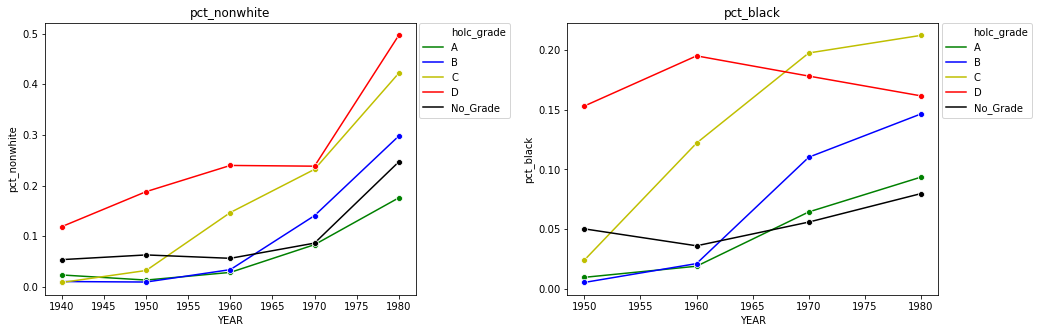

In [15]:
#line graph summarizing demographic trends in each HOLC area by decade

fig,axes=plt.subplots(nrows=1, ncols=2,figsize=(16,5), gridspec_kw={'wspace' : .41})
metric=['pct_nonwhite','pct_black']

for ax, met in zip(axes.flat, metric):
    sns.lineplot(x='YEAR',y=met,
             data=grade_year,
             hue='holc_grade',
             estimator=None,
             marker='o',
             ax=ax,
             palette=['g','b','y','r','black'])
    ax.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
    ax.set_title(met)


D and C graded areas change substantially relative to other areas, but other graded areas of converging

Text(0.5, 1.0, '1980')

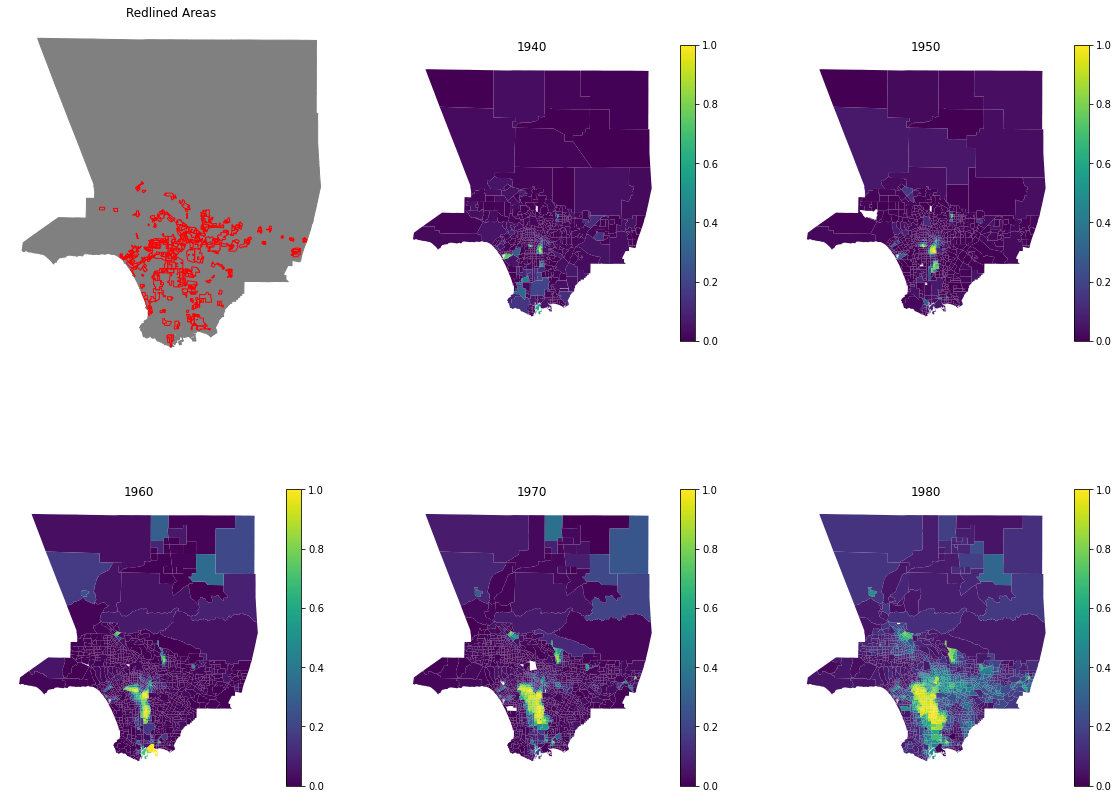

In [16]:
#map the areas by decade with percent non-white population and compare to redlined (C and D graded) areas

fig,ax=plt.subplots(nrows=2, ncols=3, figsize=(20,15))

#show where in LA county was redlined
ax=plt.subplot(2,3,1)
forties_data.plot(color='grey',edgecolor='grey',ax=ax)
redline[redline['holc_grade'].isin(['C','D'])].plot(color='none',edgecolor='red',ax=ax,vmax=1,vmin=0)
ax.set_axis_off()
ax.set_title('Redlined Areas')

#all by decadeb

ax1=plt.subplot(2,3,2)
forties_data.plot('pct_nonwhite', figsize=(10,15), legend=True, legend_kwds={'shrink' : .8},ax=ax1,vmax=1,vmin=0)
ax1.set_axis_off()
ax1.set_title('1940')


ax2=plt.subplot(2,3,3)
fifties_data.plot('pct_nonwhite', figsize=(10,15), legend=True, legend_kwds={'shrink' : .8},ax=ax2,vmax=1,vmin=0)
ax2.set_axis_off()
ax2.set_title('1950')


ax3=plt.subplot(2,3,4)
sixties_data.plot('pct_nonwhite', figsize=(10,15), legend=True, legend_kwds={'shrink' : .8},ax=ax3,vmax=1,vmin=0)
ax3.set_axis_off()
ax3.set_title('1960')


ax4=plt.subplot(2,3,5)
seventies_data.plot('pct_nonwhite', figsize=(10,15), legend=True, legend_kwds={'shrink' : .8},ax=ax4,vmax=1,vmin=0)
ax4.set_axis_off()
ax4.set_title('1970')


ax5=plt.subplot(2,3,6)
eighties_data.plot('pct_nonwhite', figsize=(10,15), legend=True, legend_kwds={'shrink' : .8},ax=ax5,vmax=1,vmin=0)
ax5.set_axis_off()
ax5.set_title('1980')


The nonwhite population definitely grew in the areas that were redlined and the population was very concentrated over the whole period. I wonder if the 1980 definition changed...

## Present Day Analysis

In [17]:
#Import tract sociodemographic data from 2014-2018

data=pd.read_csv('data/2018/nhgis0027_csv/nhgis0027_ds239_20185_2018_tract.csv')

In [18]:
#Limit data to los angeles

la_data=data[data['COUNTY']=='Los Angeles County']

In [19]:
#clean the data


#rename columns
rename={'AJWME001' : 'total_pop',
        'AJWNE002' : 'white_pop',
        'AJWNE003' : 'black_pop',
        'AJWNE004' : 'other1',
        'AJWNE005' : 'other2',
        'AJWNE006' : 'other3',
        'AJWNE007' : 'other4',
        'AJWNE008' : 'other5',
        'AJWVE003' : 'nonh_white_pop',
        'AJWVE004' : 'nonh_black_pop',
        'AJWVE005' : 'nonh_other_1',
        'AJWVE006' : 'nonh_other_2',
        'AJWVE007' : 'nonh_other_3',
        'AJWVE008' : 'nonh_other_4',
        'AJWVE009' : 'nonh_other_5',
        'AJWVE012' : 'hispanic_pop',
        'AJZAE001' : 'median_income',
        'AJ1UE001' : 'total_units',
        'AJ1UE002' : 'owner_units',
        'AJ1UE003' : 'rental_units'}
        
la_data.rename(columns=rename, inplace=True)

#fill nan with 0
columns=['total_pop','white_pop','black_pop','other1','other2',
         'other3','other4','other5','nonh_white_pop','nonh_black_pop',
         'nonh_other_1','nonh_other_2','nonh_other_3','nonh_other_4',
         'nonh_other_5','hispanic_pop','median_income','total_units','owner_units','rental_units']

for col in columns:
    la_data[col] = la_data[col].fillna(0)


#calc metrics
la_data['other_nonwhite_pop'] = la_data['other1'] + la_data['other2'] + la_data['other3'] +la_data['other4'] + la_data['other5']
la_data['pct_white'] = la_data['white_pop']/la_data['total_pop']
la_data['pct_nonwhite'] = 1-la_data['pct_white']
la_data['pct_black'] = la_data['black_pop'] / la_data['total_pop']
la_data['nonwhite_pop'] = la_data['black_pop'] + la_data['other_nonwhite_pop']

la_data['pct_nonh_white'] = la_data['nonh_white_pop']/la_data['total_pop']
la_data['pct_nonh_black'] = la_data['nonh_black_pop']/la_data['total_pop']
la_data['pct_hispanic'] = la_data['hispanic_pop']/la_data['total_pop']
la_data['nonh_other_pop'] = la_data['nonh_other_1'] + la_data['nonh_other_2'] + la_data['nonh_other_3'] + la_data['nonh_other_4'] + la_data['nonh_other_5']
la_data['pct_nonh_other'] = la_data['nonh_other_pop']/la_data['total_pop']

la_data['owner_rate'] = la_data['owner_units']/la_data['total_units']


In [20]:
#import 2018 tigerline tract from nhgis and align CRS
gdf=gpd.read_file('data/2018/nhgis0027_shape/nhgis0027_shapefile_tl2018_us_tract_2018')
gdf.to_crs(utm,inplace=True)

#remove islands
islands=['06037599000','06037599100']
gdf=gdf[~gdf['GEOID'].isin(islands)]

In [21]:
#merge data to tract shapefile

la_data_gdf=pd.merge(gdf,la_data,left_on='GISJOIN',right_on='GISJOIN',how='inner')

In [22]:
#identify the grade each tract received

#generate centroid
la_data_gdf['centroid']=la_data_gdf.centroid

#spatial join to get grade for each tract
la_data_gdf.set_geometry('centroid',inplace=True)
la_tract_grades=gpd.sjoin(la_data_gdf,redline,how='left',op='within')
la_tract_grades=la_tract_grades[['GISJOIN','holc_grade']]

#reset geom
la_data_gdf.set_geometry('geometry',inplace=True)


In [23]:
#merge grade into data and fill nan with "no grade"

#merge
la_data_gdf=la_data_gdf.merge(la_tract_grades,left_on='GISJOIN',right_on='GISJOIN',how='left')

#fill nana
la_data_gdf['holc_grade']=la_data_gdf['holc_grade'].fillna('No Grade')

#create a dummy variable for if the tract is C or D graded
la_data_gdf['redline_dummy'] = la_data_gdf['holc_grade'].isin(['C','D']).astype(int)

In [24]:
#Calculate descriptive statistics for tracts in each grade area

#limit to these columns
colmns=['black_pop','nonwhite_pop','white_pop','total_pop','total_units','owner_units',
        'nonh_white_pop','nonh_black_pop','hispanic_pop','median_income']

#summarize those columns by holc grade
grade_summary=la_data_gdf.groupby('holc_grade')[colmns].sum()

#calculate summary metrics by grade
grade_summary['pct_white'] = grade_summary['white_pop']/grade_summary['total_pop']
grade_summary['pct_own'] = grade_summary['owner_units']/grade_summary['total_units']
grade_summary['pct_nonwhite'] = 1-grade_summary['pct_white']
grade_summary['pct_black'] = grade_summary['black_pop']/grade_summary['total_pop']
grade_summary['pct_hispanic'] = grade_summary['hispanic_pop']/grade_summary['total_pop']

#show summary metrics
print(la_data_gdf.groupby('holc_grade')['median_income'].mean())
print('')
grade_summary[['pct_white','pct_own','pct_nonwhite','pct_black','pct_hispanic']]

holc_grade
A           120843.404762
B            77884.481013
C            54374.357401
D            52262.640288
No Grade     75411.720397
Name: median_income, dtype: float64



,pct_white,pct_own,pct_nonwhite,pct_black,pct_hispanic
holc_grade,,,,,
A,0.646974,0.640915,0.353026,0.088118,0.157376
B,0.590717,0.431226,0.409283,0.093657,0.359820
C,0.467747,0.295884,0.532253,0.096793,0.527344
D,0.466793,0.287638,0.533207,0.081987,0.647087
No Grade,0.529260,0.563029,0.470740,0.073616,0.457017


C and D graded areas are less white, less likely to own, lower income, and more hispanic. Note: white and non-hispanic white are mixed up in this table.

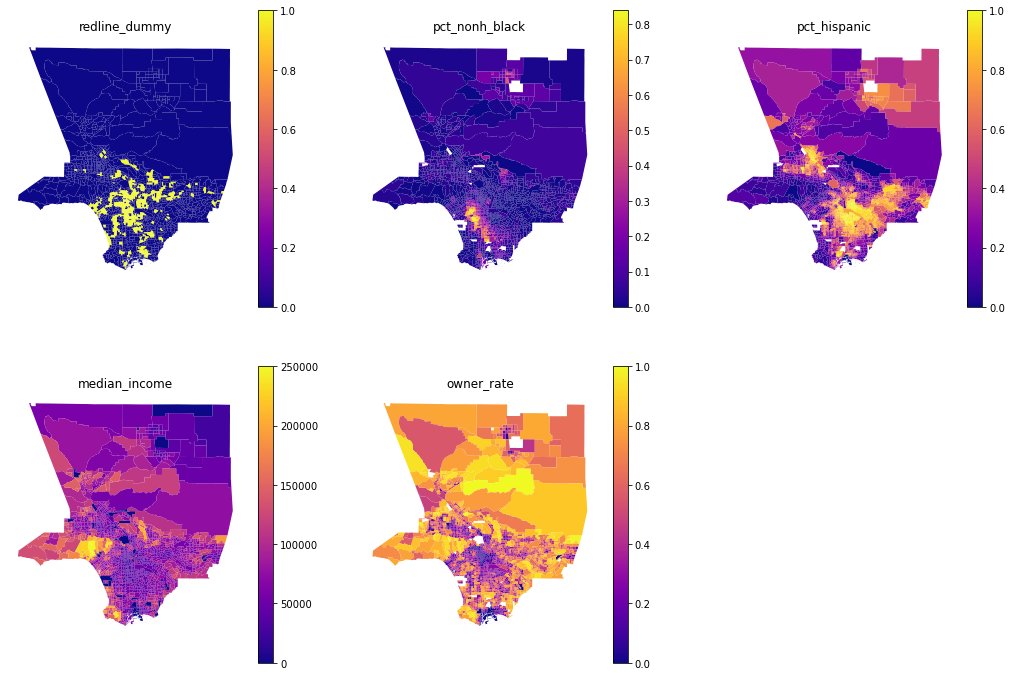

In [25]:
#show maps of redlined areas and other metrics. I'll have to fix first map legend.

maps=['redline_dummy','pct_nonh_black','pct_hispanic','median_income','owner_rate']

fig,ax=plt.subplots(nrows=2,ncols=3,figsize=(18,12))

for a,m in zip(ax.flat,maps):
    la_data_gdf.plot(column=m,ax=a,cmap='plasma',legend=True)
    a.set_axis_off()
    a.set_title(m)
ax[1][2].remove()

## Regression Analysis

Even after accounting for Race/Ethnicity and income do redlined areas have fewer owners?

In [26]:
model_df=la_data_gdf[['GISJOIN','owner_rate','median_income','pct_nonh_white','pct_nonh_black','pct_hispanic','pct_nonh_other','holc_grade','redline_dummy']]
model_df=model_df.dropna()

#make metrics more easily interpretable

#turn proportions into percentage points
metrs=['owner_rate','pct_nonh_white','pct_nonh_black','pct_hispanic','pct_nonh_other']
for m in metrs:
    model_df[m] = model_df[m]*100

#median income in thousands
model_df['median_income'] = model_df['median_income']/1000

In [27]:
X=model_df[['median_income','pct_nonh_black','pct_nonh_other','pct_hispanic','redline_dummy']]
Y=model_df['owner_rate']
X=sm.add_constant(X)

model=sm.OLS(Y,X).fit(cov_type='HC1')
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             owner_rate   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     520.2
Date:                Fri, 02 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:57:40   Log-Likelihood:                -9806.1
No. Observations:                2317   AIC:                         1.962e+04
Df Residuals:                    2311   BIC:                         1.966e+04
Df Model:                           5                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -15.7107      2.841     -5.

Even after accounting for income and discrimination that face minority residents, previously redlined areas are associated with  15 percentage points less ownership. 